In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['font.size'] = 18

In [9]:
BV_NGC104,mv_NGC104 = np.loadtxt('Data/ngc104.dat',unpack=True)

In [10]:
Bv_fit,mv_fit = np.loadtxt('Data/CMD-fit-NGC104.dat',unpack=True)

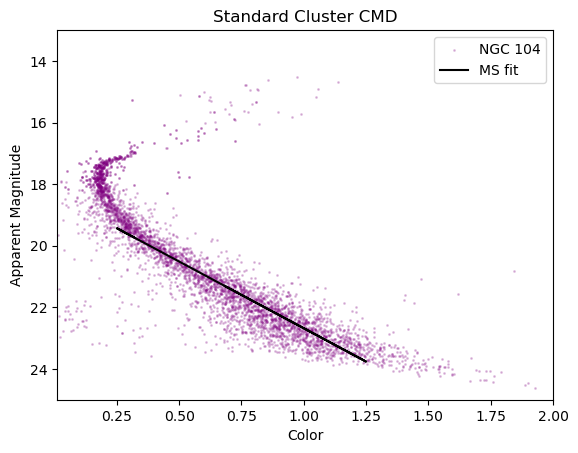

In [154]:
plt.scatter(BV_NGC104,mv_NGC104,s=1.2,c="purple",alpha=0.2,label="NGC 104")
plt.plot(Bv_fit,mv_fit,"k",label="MS fit")
plt.axis([0.01,2.0,25,13])
plt.xlabel("Color")
plt.ylabel("Apparent Magnitude")
plt.title("Standard Cluster CMD")
plt.legend()
plt.savefig("Figures/standard_cmd.pdf")

In [155]:
#slope and intercept of the NGC 104 MS fit
m = 4.331707451509989
c = 18.348343308072117

In [224]:
#Converting to absolute magnitude for NGC104

mu_NGC104 = 13.37
Mv_NGC104 = mv_NGC104 - mu_NGC104
Mv_fit = mv_fit - mu

In [245]:

def convert_to_m(M,mu):
    #returns apparent magnitude
    m = M + mu
    return m

def find_nearest(array, value):
    #find the nearest value in the array for a given value
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def app_distance_modulus(BV_value,color,mv_c):
    
    mv_st = m * BV_value + c
    Mv_st = mv_st - mu_NGC104
    
    idx1 = find_nearest(color,BV_value)
    idx2 = find_nearest(BV_NGC104,BV_value)
    
    #mu = mv_c[idx1] - Mv_st
    mu = mv_c[idx1] - Mv_NGC104[idx2]
    
    #d = np.power(10, (mu+5)/5)
    return mu


In [279]:
def find_distance1(cluster_name):
    
    file_name = "Data/"+cluster_name+".dat"
    Color,Abs = np.loadtxt(file_name,unpack = True)
    
    D = []
    for BVs in Color:
        D.append(app_distance_modulus(BVs,Color,Abs))
    
    n, bins, patches = plt.hist(D)
    print(np.mean(D))
    mu_D_mean = np.mean(D)
    mud_err = np.std(D)
    
    mode_index = n.argmax()
    dis = (bins[mode_index] + bins[mode_index+1])/2
    print('the mode:'+ str(dis))
    
    mV_fit=convert_to_m(Mv_NGC104,mu_D_mean)
    
    err = []
    for BVV in Color:
        i1 = find_nearest(Color,BVV)
        i2 = find_nearest(BV_NGC104,BVV)
        res = np.abs(mV_fit[i2]-Abs[i1])**2
        err.append(res)
    
    mu_err = np.sqrt(np.mean(err))
    
    derr = np.power(10, (mu_err+5)/5)
    print(mu_err)                      
    
    plt.figure(figsize=[10,10])
    plt.scatter(BV_NGC104,mV_fit,s=1.0,c="red",label="standard CMD fit")
    plt.scatter(Color,Abs,s=1.2,c="blue",label= cluster_name)
    #plt.scatter(BV,mV,s=1.2,c="red",alpha=0.1,label="NGC104")
    #plt.plot(Bv_fit,Bv_fit*m + c,"k-")
    plt.axis([-0.2,1.5,25,14])
    plt.xlabel("Color")
    plt.ylabel("Magnitude")
    plt.legend(loc=2, prop={'size': 18})
    plt.title("$\mu = %3.2f \pm %3.2f $"%(mu_D_mean,mud_err))
    plt.savefig("Figures/Distance/"+cluster_name+".pdf")
    

12.582513129102844
the mode:13.416199999999996
1.7919539554611426


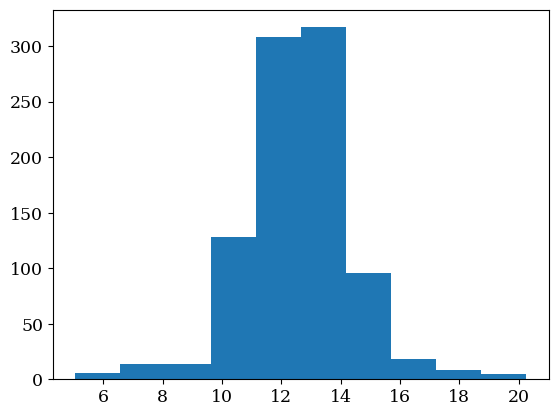

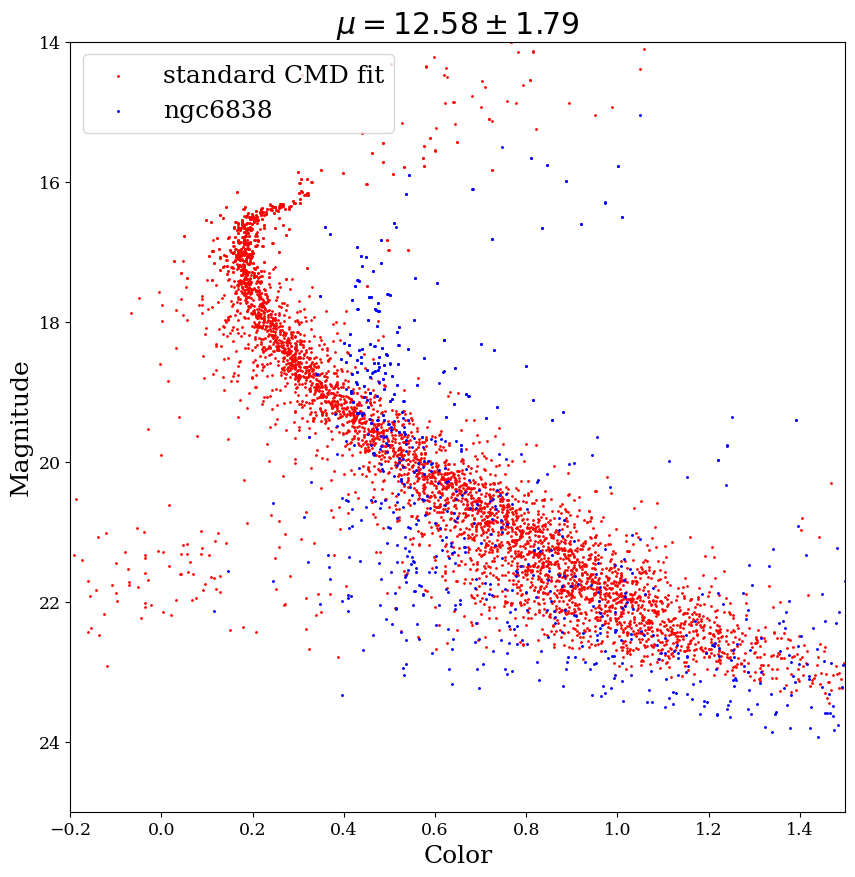

In [293]:
find_distance1("ngc6838")